In [28]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import tqdm.notebook as tqdm
import os

In [5]:
f = h5py.File("/storage/agrp/dreyet/GNtau/samples/v04/output/pp_output_test.h5")

In [6]:
#f.close()

In [8]:
flav = f['jets']['HadronConeExclTruthLabelID']

In [9]:
np.unique(flav, return_counts=True) 

(array([0., 5.], dtype=float32), array([4800000, 1000000]))

In [10]:
np.unique(flav, return_counts=True) 

(array([0., 5.], dtype=float32), array([4800000, 1000000]))

In [14]:
tau_file = h5py.File('/storage/agrp/dreyet/GNtau/samples/v04/ntuples/tau/tau_samp0_1.h5')
jet_file = h5py.File('/storage/agrp/dreyet/GNtau/samples/v04/ntuples/qcd/jet_samp0_1.h5')

In [15]:
tau_jets = tau_file['jets'][:200000]
jets = jet_file['jets'][:200000]

In [16]:
tau_tracks = tau_file['tracks'][:200000]
tracks = jet_file['tracks'][:200000]

In [17]:
jets[0].dtype

dtype([('TAU_centFrac', '<f4'), ('TAU_sumEMCellEtOverLeadTrkPt', '<f4'), ('TAU_dRmax', '<f4'), ('TAU_trFlightPathSig', '<f4'), ('TAU_etOverPtLeadTrk', '<f4'), ('TAU_ptRatioEflowApprox', '<f4'), ('TAU_mEflowApprox', '<f4'), ('TAU_massTrkSys', '<f4'), ('TAU_SumPtTrkFrac', '<f4'), ('TAU_EMPOverTrkSysP', '<f4'), ('TAU_isolFrac', '<f4'), ('TAU_RNNJetScore', '<f4'), ('TAU_RNNJetScoreSigTrans', '<f4'), ('HadronConeExclTruthLabelID', '<f4'), ('pt', '<f4'), ('absEta', '<f4'), ('eventNumber', '<f4')])

In [18]:
pt = tracks['jetSeedPt'] / 1000
track_scores = [tracks['rnn_fakeScore'], tracks['rnn_chargedScore'], tracks['rnn_isolationScore'], tracks['rnn_conversionScore']]
track_valids = tracks['valid']
track_truth = tracks['NewTruthType']
prongs = np.sum(np.argmax(np.stack(track_scores,axis=-1), axis=-1)==1, axis=-1)

In [19]:
arr = []
arr2 = []
for el in tau_tracks['jetSeedPt']:
    arr.append(np.sum(~np.isnan(el)))
for el in tracks['jetSeedPt']:
    arr2.append(np.sum(~np.isnan(el)))

In [20]:
np.unique(np.concatenate(tau_tracks['tauTruthDecayMode']), return_counts=True)

(array([ 0.,  1.,  2.,  3.,  4.,  5., nan], dtype=float32),
 array([ 343464,  996677,  480585,  384306,  233217,    4278, 3557473]))

In [21]:
np.unique(np.concatenate(tracks['tauTruthDecayMode']), return_counts=True)

(array([-1.111e+03,  0.000e+00,  1.000e+00,  2.000e+00,  3.000e+00,
         4.000e+00,  5.000e+00,  6.000e+00,        nan], dtype=float32),
 array([4004088,    1008,    1975,     647,     847,     319,      29,
           2533, 1988554]))

In [ ]:
f = h5py.File('umami/PFlow-hybrid-resampled.h5')

In [ ]:
tracks = f['tracks'][:]

In [ ]:
np.std(tracks['dz0_TV_PV0'][tracks['valid'].astype(int)])

In [ ]:
tracks['valid'].astype(bool)

In [ ]:
np.unique(tracks['dz0_TV_PV0'][tracks['valid'].astype(bool)], return_counts=True)

In [ ]:
np.std(np.array(tracks['numberOfSCTSharedHits'][~np.isnan(tracks['dz0_TV_PV0'])]))

In [ ]:
plt.hist(np.concatenate(tau_tracks['numberOfPixelHoles']), histtype='step', density=True)
plt.hist(np.concatenate(tracks['numberOfPixelHoles']), histtype='step', density=True)
plt.yscale('log')
plt.show()

In [ ]:
tau_pt = tau_tracks['jetSeedPt'][:500000, 0]
pt = tracks['jetSeedPt'][:500000, 0]

In [ ]:
eta = tau_tracks['jetSeedEta'][:, 0]

In [ ]:
plt.hist(tau_pt / 1000, range=(0, 1000), bins=100, density=True, histtype='step')
plt.hist(pt / 1000, range=(0, 1000), bins=100, density=True, histtype='step')
plt.yscale('log')
plt.show()

In [ ]:
np.random.rand(4, 10).shape[0]

In [ ]:
plt.hist(eta, bins=100)
plt.show()

In [24]:
bkg_sample_paths = [
'/storage/agrp/dreyet/GNtau/samples/v04/user.ntamir.GNsamps_ntup_slim_Dijet_MC21.GNTau_MxAOD_Dijet_MC21_slim.801166_v1_converted/user.ntamir.34744418._000001.ntuple.h5',
'/storage/agrp/dreyet/GNtau/samples/v04/user.ntamir.GNsamps_ntup_slim_Dijet_MC21.GNTau_MxAOD_Dijet_MC21_slim.801167_v1_converted/user.ntamir.34744419._000001.ntuple.h5',
'/storage/agrp/dreyet/GNtau/samples/v04/user.ntamir.GNsamps_ntup_slim_Dijet_MC21.GNTau_MxAOD_Dijet_MC21_slim.801168_v1_converted/user.ntamir.34744420._000001.ntuple.h5',
'/storage/agrp/dreyet/GNtau/samples/v04/user.ntamir.GNsamps_ntup_slim_Dijet_MC21.GNTau_MxAOD_Dijet_MC21_slim.801169_v1_converted/user.ntamir.34744421._000001.ntuple.h5',
'/storage/agrp/dreyet/GNtau/samples/v04/user.ntamir.GNsamps_ntup_slim_Dijet_MC21.GNTau_MxAOD_Dijet_MC21_slim.801170_v1_converted/user.ntamir.34744422._000001.ntuple.h5',
'/storage/agrp/dreyet/GNtau/samples/v04/user.ntamir.GNsamps_ntup_slim_Dijet_MC21.GNTau_MxAOD_Dijet_MC21_slim.801171_v1_converted/user.ntamir.34744423._000001.ntuple.h5',
'/storage/agrp/dreyet/GNtau/samples/v04/user.ntamir.GNsamps_ntup_slim_Dijet_MC21.GNTau_MxAOD_Dijet_MC21_slim.801172_v1_converted/user.ntamir.34744424._000001.ntuple.h5',
'/storage/agrp/dreyet/GNtau/samples/v04/user.ntamir.GNsamps_ntup_slim_Dijet_MC21.GNTau_MxAOD_Dijet_MC21_slim.801173_v1_converted/user.ntamir.34744425._000001.ntuple.h5',
]

bkg_sample_labels = {
    '801166': 'JZ1',
    '801167': 'JZ2',
    '801168': 'JZ3',
    '801169': 'JZ4',
    '801170': 'JZ5',
    '801171': 'JZ6',
    '801172': 'JZ7',
    '801173': 'JZ8',
}

In [29]:
### check that each path exists:
for path in bkg_sample_paths:
    assert os.path.exists(path), f'path {path} does not exist'

In [30]:
pt = {}
for i, samp in tqdm.tqdm(enumerate(bkg_sample_paths), total=len(bkg_sample_paths)):
    with h5py.File(samp, 'r') as f:
        pt[i] = f['tracks']['jetSeedPt'][:, 0] / 1000

  0%|          | 0/8 [00:00<?, ?it/s]

In [31]:
with h5py.File('/storage/agrp/dreyet/GNtau/samples/v04/ntuples/qcd/jet_samp0_1.h5', 'r') as f:
    pt_combined = f['tracks']['jetSeedPt'][:, 0] / 1000

In [5]:
((pt_combined > 10) & (pt_combined < 150)).sum()

1474200

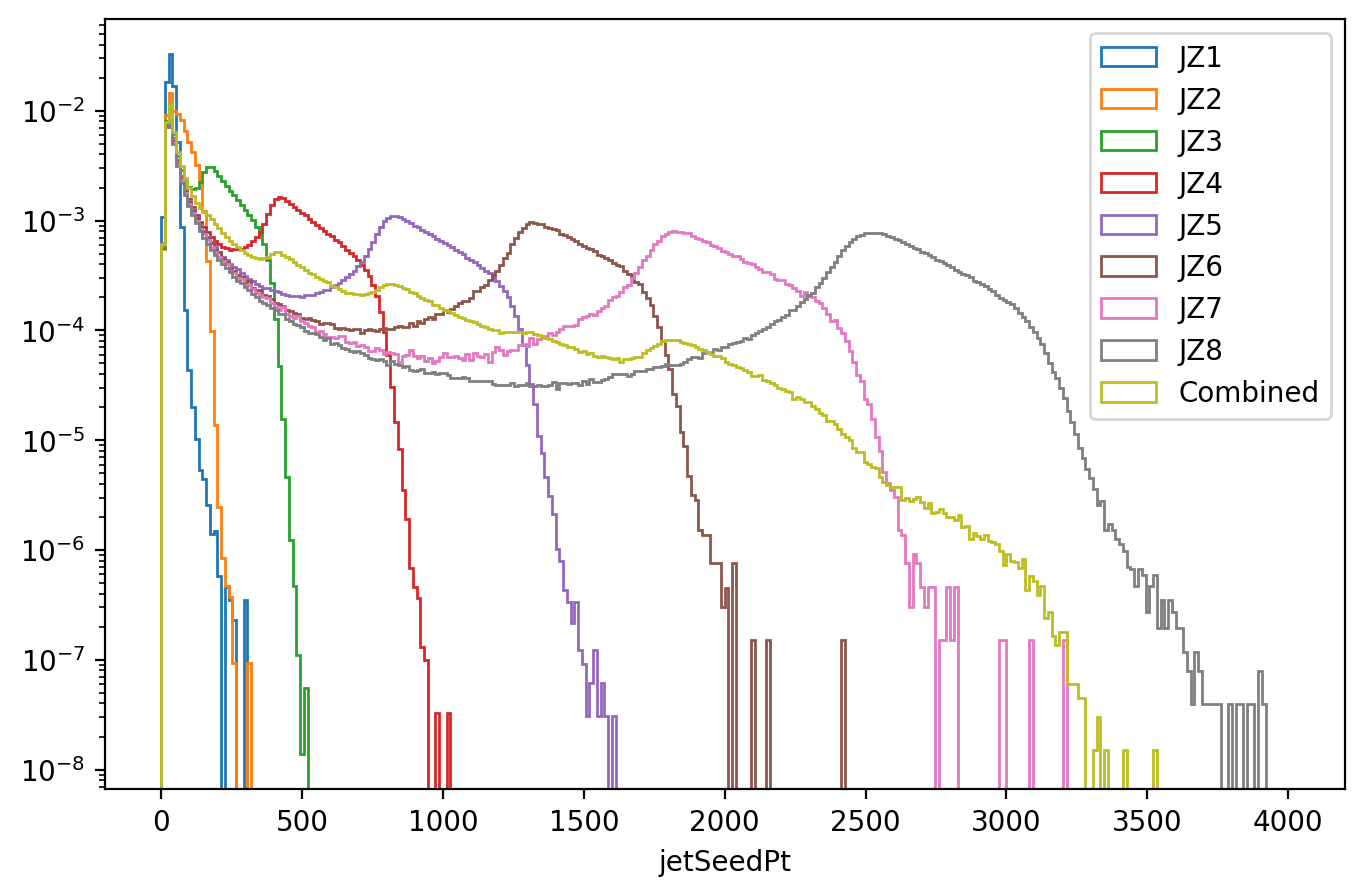

In [33]:
fig = plt.figure(figsize=(8, 5), dpi=200)
for val, el in pt.items():
    plt.hist(el[~np.isnan(el)], bins=300, density=True, histtype='step', label=f'JZ{val+1}', range=(0, 4000))
plt.hist(pt_combined[~np.isnan(pt_combined)], bins=300, density=True, histtype='step', label=f'Combined', range=(0, 4000))
plt.yscale('log')
plt.xlabel('jetSeedPt')
plt.legend()
plt.show()